In [2]:
# numpy
import numpy as np
np.random.seed(1234)
from numpy.random import default_rng
rng = default_rng()
# import functions
from scipy.special import kv, iv, erf
from scipy.integrate import quad
from numpy import log, log10, sin, cos, exp, sqrt, tan, pi, heaviside
# interpolate
from scipy import interpolate
# physical constants
from scipy.constants import c, alpha, hbar, e
from scipy.constants import electron_mass, elementary_charge, speed_of_light
from scipy.constants import c, m_e, e, epsilon_0 # physical constants
m_eV = electron_mass * speed_of_light**2 / elementary_charge; # electron mass [eV]
m = m_eV*1e-9; #[GeV] = 0.5109989461e-3
# root finding
from scipy.optimize import fsolve
from scipy import optimize
# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
# progress bar
from tqdm.notebook import tqdm
from tqdm import trange
from time import sleep
# h5py
import h5py
# os
import os
# glob
import glob

In [17]:
files_electrons = glob.glob('a03g5000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a03g5000t50 = np.zeros(len(files_electrons))
gsig_a03g5000t50 = np.zeros(len(files_electrons))
#
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a03g5000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a03g5000t50[i] = sqrt( np.sum( (enedist-gavg_a03g5000t50[i])**2 * qdist)/np.sum(qdist) )


files_electrons = glob.glob('a06g5000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a06g5000t50 = np.zeros(len(files_electrons))
gsig_a06g5000t50 = np.zeros(len(files_electrons))
#
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a06g5000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a06g5000t50[i] = sqrt( np.sum( (enedist-gavg_a06g5000t50[i])**2 * qdist)/np.sum(qdist) )


files_electrons = glob.glob('a12g2000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a12g2000t50 = np.zeros(len(files_electrons))
gsig_a12g2000t50 = np.zeros(len(files_electrons))
#
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a12g2000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a12g2000t50[i] = sqrt( np.sum( (enedist-gavg_a12g2000t50[i])**2 * qdist)/np.sum(qdist) )


files_electrons = glob.glob('a12g5000t50/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a12g5000t50 = np.zeros(len(files_electrons))
gsig_a12g5000t50 = np.zeros(len(files_electrons))
#
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a12g5000t50[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a12g5000t50[i] = sqrt( np.sum( (enedist-gavg_a12g5000t50[i])**2 * qdist)/np.sum(qdist) )



files_electrons = glob.glob('a12g5000t70/MS/RAW/electrons/*-electrons-*.h5')
files_electrons.sort()
#
gavg_a12g5000t70 = np.zeros(len(files_electrons))
gsig_a12g5000t70 = np.zeros(len(files_electrons))
#
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    gavg_a12g5000t70[i] = np.sum(enedist*qdist)/np.sum(qdist)
    gsig_a12g5000t70[i] = sqrt( np.sum( (enedist-gavg_a12g5000t70[i])**2 * qdist)/np.sum(qdist) )

(0.0, 50.0)

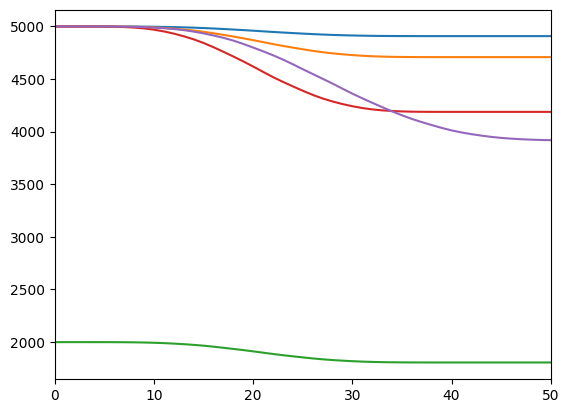

In [19]:
plt.plot(gavg_a03g5000t50)
plt.plot(gavg_a06g5000t50)
plt.plot(gavg_a12g2000t50)
plt.plot(gavg_a12g5000t50)
plt.plot(gavg_a12g5000t70)
#plt.plot(gsig)
plt.xlim([0,50])

(0.0, 50.0)

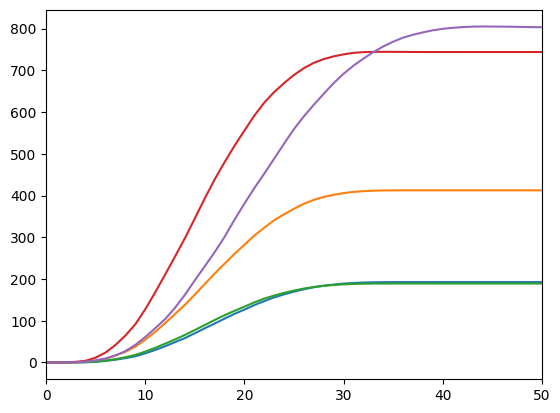

In [33]:
plt.plot(gsig_a03g5000t50)
plt.plot(gsig_a06g5000t50)
plt.plot(gsig_a12g2000t50)
plt.plot(gsig_a12g5000t50)
plt.plot(gsig_a12g5000t70)
#plt.plot(gsig)
plt.xlim([0,50])

In [ ]:
a0lst = np.arange(0.2,12.1,0.2)

thg_osiris = np.zeros_like(a0lst)
avge_osiris = np.zeros_like(a0lst)
sige_osiris = np.zeros_like(a0lst)
the_osiris = np.zeros_like(a0lst)
Ng_osiris = np.zeros_like(a0lst) # total photon charge
Ne_osiris = np.zeros_like(a0lst) # total electron charge
for i in range(len(files_photons)):
    filef = h5py.File(files_photons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])
    p1dist = np.array(filef['p1'])
    p2dist = np.array(filef['p2'])
    p3dist = np.array(filef['p3'])
    #thgdist = np.arctan2(sqrt(p2dist**2+p3dist**2), p1dist)
    thgdist = np.arctan2(sqrt(p2dist**2), p1dist)
    thg_osiris[i] = sqrt(np.sum(thgdist**2 * qdist)/np.sum(qdist))
    Ng_osiris[i] = np.sum(qdist)
    
    filef = h5py.File(files_electrons[i], 'r')
    enedist = np.array(filef['ene'])
    qdist = np.array(filef['q'])*-1
    p1dist = np.array(filef['p1'])
    p2dist = np.array(filef['p2'])
    p3dist = np.array(filef['p3'])
    #thedist = np.arctan2(sqrt(p2dist**2+p3dist**2), p1dist)
    thedist = np.arctan2(sqrt(p2dist**2), p1dist)
    the_osiris[i] = sqrt(np.sum(thedist**2 * qdist)/np.sum(qdist))
    avge_osiris[i] = np.sum(enedist * qdist)/np.sum(qdist)
    sige_osiris[i] = sqrt( np.sum( (enedist-avge_osiris[i])**2 * qdist)/np.sum(qdist) )
    Ne_osiris[i] = np.sum(qdist)